Problem Statement 
I decided to treat this as a classification problem by creating a new binary variable affair 
(did the woman have at least one affair?) and trying to predict the classification for each woman.

The dataset I chose is the affairs dataset that comes with Statsmodels. 
It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about 
their participation in extramarital affairs. More information about the study is available in a 1978 paper 
from the Journal of Political Economy.

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset
dta = sm.datasets.fair.load_pandas().data
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [3]:
# Add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
# Group by affair to show the mean values
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [5]:
# Group by Rating of the marriage. This shows that as the rating increases affairs decrease. 

dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [6]:
# Group by Age. This shows the relation between age and affairs

dta.groupby('age').mean()

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
age,,,,,,,,,
17.5,4.316547,1.550360,0.215827,2.366906,12.589928,2.899281,3.115108,0.645324,0.093525
22.0,4.238889,2.724167,0.373056,2.336111,13.911667,3.261111,3.486667,0.928274,0.225556
27.0,4.126359,5.851890,0.970482,2.328845,14.660798,3.503884,3.959089,0.819545,0.327809
32.0,4.048644,12.233863,2.029935,2.475210,14.333957,3.498597,4.062675,0.548795,0.397568
37.0,3.941640,16.880915,2.771293,2.586751,13.960568,3.484227,4.045741,0.448880,0.425868
42.0,3.955864,21.632409,3.013871,2.683480,14.104666,3.543506,4.095839,0.348074,0.385876


In [7]:
# Group by Religious rating. More religious women have lesser affairs.
# woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

dta.groupby('religious').mean()

,rate_marriage,age,yrs_married,children,educ,occupation,occupation_husb,affairs,affair
religious,,,,,,,,,
1.0,4.077375,27.704212,7.439765,1.041626,14.441724,3.431929,3.902057,1.246989,0.399608
2.0,4.021173,28.618218,8.650640,1.334804,13.985002,3.369210,3.820026,0.767282,0.361270
3.0,4.141206,29.536953,9.436416,1.492981,14.175475,3.439306,3.828241,0.545039,0.291908
4.0,4.349085,31.157774,11.115854,1.809451,14.753049,3.545732,3.954268,0.240431,0.181402


In [8]:
# Group by education. 
# educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 
# 17 = some graduate school, 20 = advanced degree)

dta.groupby('educ').mean()

,rate_marriage,age,yrs_married,children,religious,occupation,occupation_husb,affairs,affair
educ,,,,,,,,,
9.0,3.583333,31.729167,14.541667,2.437500,2.583333,2.833333,3.562500,0.569095,0.437500
12.0,4.042706,29.297265,10.236084,1.656910,2.398273,3.062860,3.548944,0.683993,0.346929
14.0,4.075538,28.834431,8.911946,1.402284,2.425999,3.339043,3.879227,0.823679,0.354853
16.0,4.258729,27.995524,6.888988,1.013876,2.411817,3.809311,4.051030,0.558554,0.244405
17.0,4.194118,29.492157,7.990196,1.117647,2.462745,3.935294,4.141176,0.711906,0.274510
20.0,4.209091,32.106061,9.883333,1.293939,2.572727,4.284848,4.463636,0.530783,0.266667


In [9]:
# Group by husband's occupation
# Husband's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 
# 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

dta.groupby('occupation_husb').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,affairs,affair
occupation_husb,,,,,,,,,
1.0,4.318777,23.862445,3.449782,0.353712,2.327511,14.991266,3.445415,0.657557,0.209607
2.0,4.035933,28.310398,8.530581,1.400229,2.443425,13.521407,3.130734,0.763874,0.325688
3.0,4.034694,29.358163,9.212245,1.369388,2.451020,13.812245,3.244898,0.809943,0.353061
4.0,4.114286,28.592611,8.678325,1.380049,2.415271,14.109852,3.393596,0.717594,0.314778
5.0,4.114671,30.243114,10.090219,1.521079,2.426082,14.358628,3.577853,0.615542,0.338392
6.0,4.235849,30.973585,10.046226,1.512264,2.445283,15.822642,3.905660,0.739709,0.311321


In [10]:
# Group by woman's occupation
# woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 
# 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

dta.groupby('occupation').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb,affairs,affair
occupation,,,,,,,,,
1.0,4.317073,25.451220,5.743902,0.939024,2.292683,14.975610,3.463415,0.426014,0.170732
2.0,4.061700,28.489523,9.095460,1.691502,2.396973,13.009313,3.344587,0.719556,0.293364
3.0,4.051743,28.567194,8.833812,1.293927,2.391304,13.380525,3.768954,0.755248,0.346748
4.0,4.213740,29.523991,8.702563,1.389586,2.486914,15.844602,4.023991,0.555920,0.261723
5.0,4.104054,30.584459,10.551351,1.528378,2.436486,14.077027,4.163514,0.815209,0.417568
6.0,4.174312,30.674312,8.738532,1.105505,2.504587,17.954128,5.000000,1.194300,0.366972


In [11]:
# Group by Years Married. 

dta.groupby('yrs_married').mean()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs,affair
yrs_married,,,,,,,,,
0.5,4.524324,22.156757,0.048649,2.454054,14.237838,3.302703,3.502703,0.546486,0.043243
2.5,4.239921,23.640364,0.297198,2.312684,14.384956,3.383481,3.614061,0.984877,0.215831
6.0,4.066608,26.439089,1.036810,2.347064,14.454864,3.469763,3.881683,0.741184,0.339176
9.0,3.985050,28.985050,1.649502,2.368771,14.367110,3.393688,4.061462,0.737495,0.421927
13.0,4.038983,32.610169,1.916102,2.457627,14.218644,3.474576,4.100000,0.508149,0.411864
16.5,3.952323,35.135697,2.814181,2.601467,13.710269,3.415648,4.014670,0.484304,0.451100
23.0,3.956843,41.013564,3.281751,2.652281,13.794081,3.511714,4.051788,0.369099,0.425401


Text(0,0.5,'Frequency')

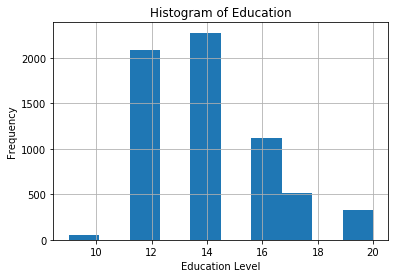

In [12]:
# Histogram of Education
%matplotlib inline
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

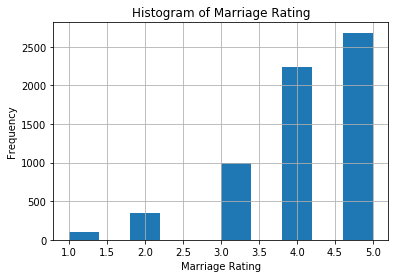

In [13]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

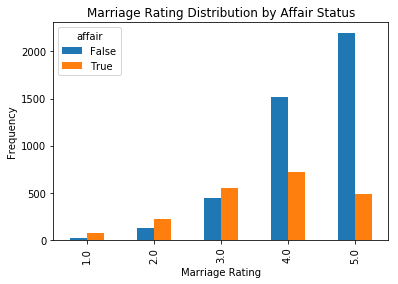

In [14]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

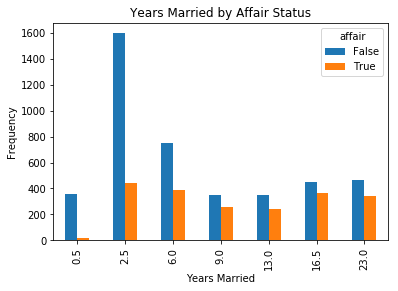

In [15]:
# barplot of years married grouped by affair (True or False)
pd.crosstab(dta.yrs_married, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Years Married by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

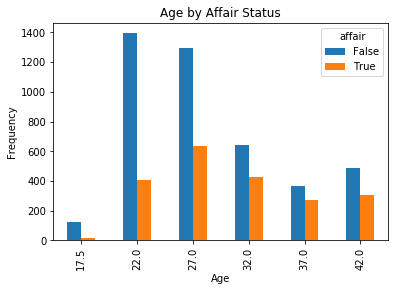

In [16]:
# barplot of age grouped by affair (True or False)
pd.crosstab(dta.age, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Age by Affair Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

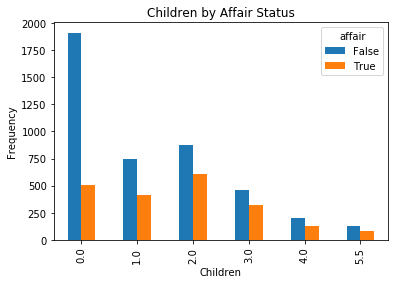

In [17]:
# barplot of children grouped by affair (True or False)
pd.crosstab(dta.children, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Children by Affair Status')
plt.xlabel('Children')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

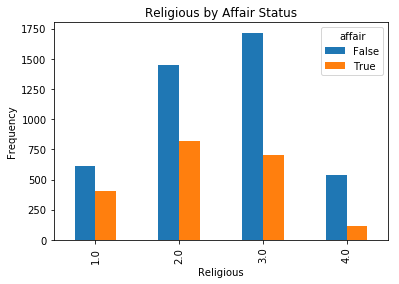

In [18]:
# barplot of religious grouped by affair (True or False)
pd.crosstab(dta.religious, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Religious by Affair Status')
plt.xlabel('Religious')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

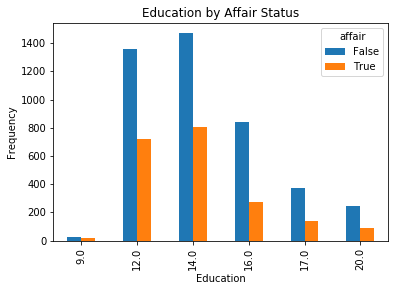

In [19]:
# barplot of education grouped by affair (True or False)
pd.crosstab(dta.educ, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Education by Affair Status')
plt.xlabel('Education')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

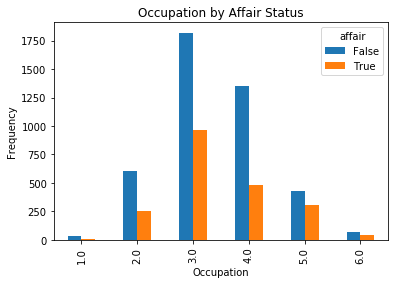

In [20]:
# barplot of occupation grouped by affair (True or False)
pd.crosstab(dta.occupation, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Occupation by Affair Status')
plt.xlabel('Occupation')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

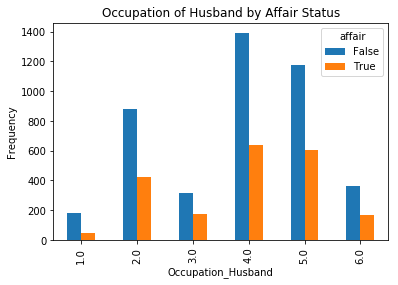

In [21]:
# barplot of occupation of husband grouped by affair (True or False)
pd.crosstab(dta.occupation_husb, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Occupation of Husband by Affair Status')
plt.xlabel('Occupation_Husband')
plt.ylabel('Frequency')

In [22]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                    religious + educ + C(occupation) + C(occupation_husb)',
                    dta, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [23]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [24]:
 # flatten y into a 1-D array
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [25]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)
# check the accuracy on the training set
print('Accuracy of the model = ' , model.score(X, y))

Accuracy of the model =  0.7258875274897895


In [26]:
 # Find the percentage had affairs?
y.mean()

0.3224945020420987

In [27]:
 # The coefficients of the parameters 
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.4898359694670391]
1,occ_2,[0.18806652950575067]
2,occ_3,[0.49894810688842595]
3,occ_4,[0.25066853816223045]
4,occ_5,[0.8390081822806965]
5,occ_6,[0.8339085245923805]
6,occ_husb_2,[0.19063586252336154]
7,occ_husb_3,[0.2978325911195185]
8,occ_husb_4,[0.16140876843141402]
9,occ_husb_5,[0.18777078470476835]


In [28]:
# Evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
# Predict class labels for the test set
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 1., 0., 1.])

In [30]:
# Generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.34898092, 0.65101908],
       [0.90832205, 0.09167795],
       [0.73456413, 0.26543587],
       ...,
       [0.33347812, 0.66652188],
       [0.68653488, 0.31346512],
       [0.35427221, 0.64572779]])

In [31]:
# Generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7425431711145997
0.7493878262385082


In [32]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[804  81]
 [247 142]]
             precision    recall  f1-score   support

        0.0       0.76      0.91      0.83       885
        1.0       0.64      0.37      0.46       389

avg / total       0.73      0.74      0.72      1274



In [33]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

In [34]:
# Use the model to predict the probability of affairs for a woman aged 30 working in a skilled job, 
# husband in a white collar job with 2 children and married for 15 years 

model.predict_proba(np.array([[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 30, 15, 2, 3, 16]]))

array([[0.77794413, 0.22205587]])

Thus the model predicts 22% probability for an affair for the woman. 